In [1]:
from qiskit import *

In [2]:
from qiskit.tools.visualization import plot_bloch_multivector, plot_histogram

In [3]:
%matplotlib inline

In [31]:
secret_number = '1001'

In [32]:
circuit = QuantumCircuit(len(secret_number)+1, len(secret_number))

# circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secret_number)))
# circuit.x(6)
circuit.x(len(secret_number))
# circuit.h(6)
circuit.h(len(secret_number))

circuit.barrier()

# circuit.cx(5,6)
# circuit.cx(3,6)
# circuit.cx(0,6)

for ii, yesno in enumerate(reversed(secret_number)):
    if yesno == '1':
        circuit.cx(ii, len(secret_number))
        
    

circuit.barrier()

# circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secret_number)))


circuit.barrier()

# circuit.measure([0,1,2,3,4,5], [0,1,2,3,4,5])
circuit.measure(range(len(secret_number)),range(len(secret_number)))

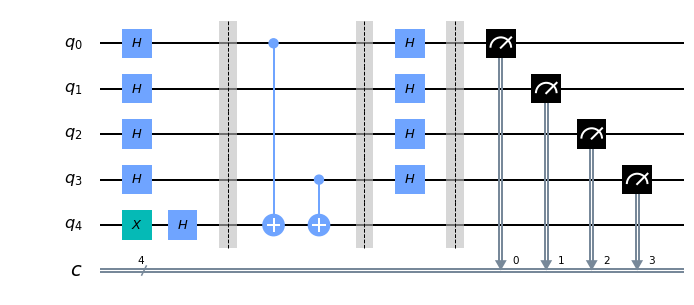

In [33]:
circuit.draw(output='mpl')

In [34]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots=1).result()
counts = result.get_counts()
# plot_histogram(counts)
print(counts)

{'1001': 1}


In [35]:
IBMQ.load_account()

provider = IBMQ.get_provider('ibm-q')

qcomp = provider.get_backend('ibmq_16_melbourne')

job = execute(circuit, backend = qcomp)

In [37]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

results = job.result()
print(results.get_counts(circuit))

Job Status: job has successfully run
{'1001': 34, '1010': 93, '1110': 86, '0001': 29, '0100': 64, '0111': 50, '0000': 108, '0101': 37, '0010': 47, '1101': 33, '1100': 118, '0110': 133, '1111': 31, '1000': 90, '0011': 31, '1011': 40}


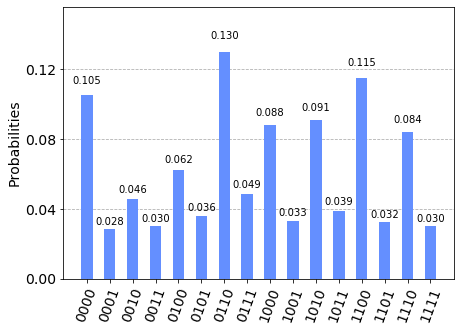

In [38]:
plot_histogram(results.get_counts(circuit))